In [30]:
import warnings


import xgboost as xgb
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import log_loss    # Log Loss for logistic regression
from sklearn.model_selection import learning_curve


from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split


In [31]:
df = pd.read_csv('diabetes_data.csv')

df.drop(columns=['Id', 'SkinThickness'], inplace=True)
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'GeneticProbability', 'Age', 'Outcome']

X = np.array(df [['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'GeneticProbability', 'Age']]) # features
y = np.array(df['Outcome'])

# Split data into train/val/test splits with 70%/10%/20% 
dev_x, test_x, dev_y, test_y = train_test_split(X, y, test_size=0.2, random_state=33)
train_x, val_x, train_y, val_y = train_test_split(dev_x, dev_y, test_size=0.125, random_state=42)
# print(len(val_x))
# print(len(test_x))
# print(len(train_x))
df.head(5)


277
554
1937


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,GeneticProbability,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [32]:
#finding the best parameters for logistic regression

# param_grid_lr = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2'],  # L1 or L2 regularization
#     'solver': ['liblinear']   # Solver compatible with L1 penalty
# }

# # Create the GridSearchCV object
# grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')

# # Fit the model
# grid_search_lr.fit(train_x, train_y)

# # Print best parameters and best score
# print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
# print("Best accuracy for Logistic Regression:", grid_search_lr.best_score_)


# # finding the best parameters for random forest



# param_grid_xgb = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 10, 15, 20],
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],
#     'gamma': [0, 0.1, 0.2]
# }

# random_search_xgb = RandomizedSearchCV(XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42), 
#                                        param_grid_xgb, cv=5, scoring='accuracy', n_iter=50, random_state=42)

# # Fit the model
# random_search_xgb.fit(train_x, train_y)

# # Print best parameters and best score
# print("Best parameters for XGBoost:", random_search_xgb.best_params_)
# print("Best accuracy for XGBoost:", random_search_xgb.best_score_)




Performance of LogisticRegression on the training set:
---------------------
Accuracy: 0.7893649974186887
Precision Score: 0.7475728155339806
F1 score: 0.6536502546689305
Recall score: 0.5806938159879337
Log loss for model: 7.592055024656582

---------------------

Performance of LogisticRegression on the validation set:
---------------------
Accuracy: 0.7472924187725631
Precision Score: 0.7027027027027027
F1 score: 0.5977011494252874
Recall score: 0.52
Log loss for model: 9.108504466563902

Confusion Matrix:



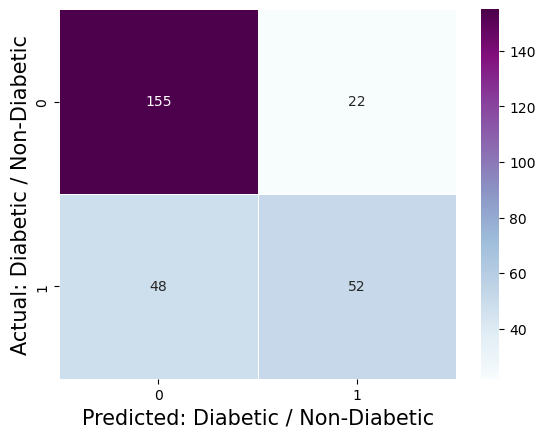

---------------------

Performance of Random Forest on the training set:
---------------------
Accuracy: 1.0
Precision Score: 1.0
F1 score: 1.0
Recall score: 1.0
Log loss for model: 2.2204460492503136e-16

---------------------

Performance of Random Forest on the validation set:
---------------------
Accuracy: 0.9783393501805054
Precision Score: 0.9433962264150944
F1 score: 0.970873786407767
Recall score: 1.0
Log loss for model: 0.780728954276906

Confusion Matrix:



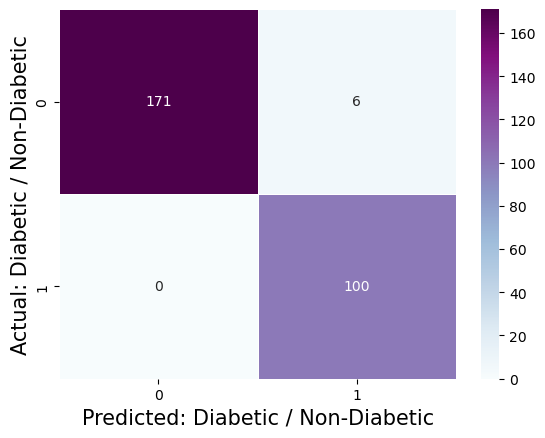

---------------------

Performance of XGB on the training set:
---------------------
Accuracy: 0.9984512132163139
Precision Score: 1.0
F1 score: 0.9977324263038548
Recall score: 0.995475113122172
Log loss for model: 0.055823934004828026

---------------------

Performance of XGB on the validation set:
---------------------
Accuracy: 0.9819494584837545
Precision Score: 0.9797979797979798
F1 score: 0.9748743718592964
Recall score: 0.97
Log loss for model: 0.6506074618974217

Confusion Matrix:



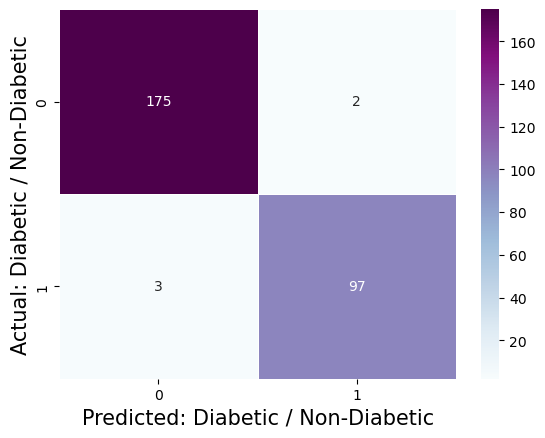

---------------------



In [33]:
# best parameters found using GridSearch and 
model_lm = LogisticRegression(C=1, penalty='l1', solver='liblinear')

model_rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)

# larger learning rate could lead to overfitting
model_XGB =  XGBClassifier(objective='binary:logistic',eval_metric='logloss', learning_rate=0.05 ,n_estimators=100, max_depth=15)                   


models_used = [('LogisticRegression', model_lm), ("Random Forest", model_rf), ('XGB', model_XGB)]# to make the confusion matrix easily interpretable

accuracy_scores_train = []
precision_scores_train = []
f1_scores_train = []
recall_scores_train = []
log_losses_train = []

accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
log_losses = []

def plot_confusion_matrix(confmat):
    ax = plt.subplot()
    sns.heatmap(confmat, annot=True, fmt='g', cmap='BuPu',linewidths=0.5)    
    ax.set_xlabel('Predicted: Diabetic / Non-Diabetic',fontsize=15)
    ax.set_ylabel('Actual: Diabetic / Non-Diabetic',fontsize=15)
    plt.show()
    

# checking the accuracies, precision_score, and f1 score
for model_name, model in models_used:
    model.fit(train_x, train_y)
    # print(f"{model_name} has been trained.\n")
    
    # evaluate training errors
    y_pred = model.predict(train_x)
    
    # calculating different performance metrics
    accuracy = accuracy_score(train_y, y_pred)
    f1Score = f1_score(train_y, y_pred)
    precision = precision_score(train_y, y_pred)
    recallScore = recall_score(train_y, y_pred)
    logLoss = log_loss(train_y, y_pred)
    
    accuracy_scores_train.append(accuracy)
    f1_scores_train.append(f1Score)
    precision_scores_train.append(precision)
    recall_scores_train.append(recallScore)
    log_losses_train.append(logLoss)
    
    print(f"Performance of {model_name} on the training set:")
    print(f'---------------------')
    print(f"Accuracy: {accuracy}")
    print(f"Precision Score: {precision}")
    print(f"F1 score: {f1Score}")
    print(f"Recall score: {recallScore}")
    print(f"Log loss for model: {logLoss}\n")
    # conf_mat = confusion_matrix(train_y, y_pred)
    # print('Confusion Matrix:\n')
    # plot_confusion_matrix(conf_mat)
    print(f'---------------------\n')
    
    # evaluate the validation errors
    y_pred_val = model.predict(val_x)
    
    # calculating different performance metrics
    accuracy = accuracy_score(val_y, y_pred_val)
    f1Score = f1_score(val_y, y_pred_val)
    precision = precision_score(val_y, y_pred_val)
    recallScore = recall_score(val_y, y_pred_val)
    logLoss = log_loss(val_y, y_pred_val)
    
    accuracy_scores.append(accuracy)
    f1_scores.append(f1Score)
    precision_scores.append(precision)
    recall_scores.append(recallScore)
    log_losses.append(logLoss)
    
    print(f"Performance of {model_name} on the validation set:")
    print(f'---------------------')
    print(f"Accuracy: {accuracy}")
    print(f"Precision Score: {precision}")
    print(f"F1 score: {f1Score}")
    print(f"Recall score: {recallScore}")
    print(f"Log loss for model: {logLoss}\n")
    conf_mat = confusion_matrix(val_y, y_pred_val)
    print('Confusion Matrix:\n')
    plot_confusion_matrix(conf_mat)
    print(f'---------------------\n')
        


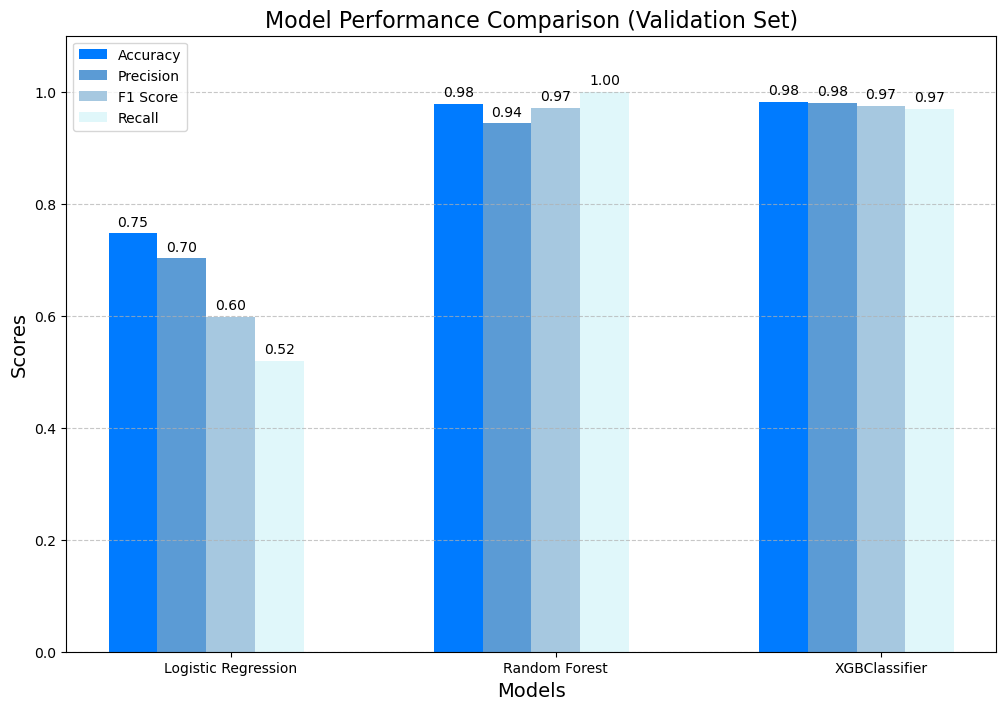

In [34]:
from sklearn.metrics import roc_curve, auc


# Example performance metrics for each model
model_names = ['Logistic Regression', 'Random Forest', 'XGBClassifier']


# Setting up the bar plot
x = np.arange(len(model_names))  # the label locations
width = 0.15  # the width of the bars

# Creating the bar plots
fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - 2*width, accuracy_scores, width, label='Accuracy', color='#007BFF')  # Blue
bars2 = ax.bar(x - width, precision_scores, width, label='Precision', color='#5B9BD5')  # Light Blue
bars3 = ax.bar(x, f1_scores, width, label='F1 Score', color='#A6C8E0')  # Very Light Blue
bars4 = ax.bar(x + width, recall_scores, width, label='Recall', color='#E0F7FA')  # Soft Blue

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Model Performance Comparison (Validation Set)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Adding value annotations on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

# Show the plot
plt.ylim(0, 1.1)  # Adjusting the y-axis limit for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



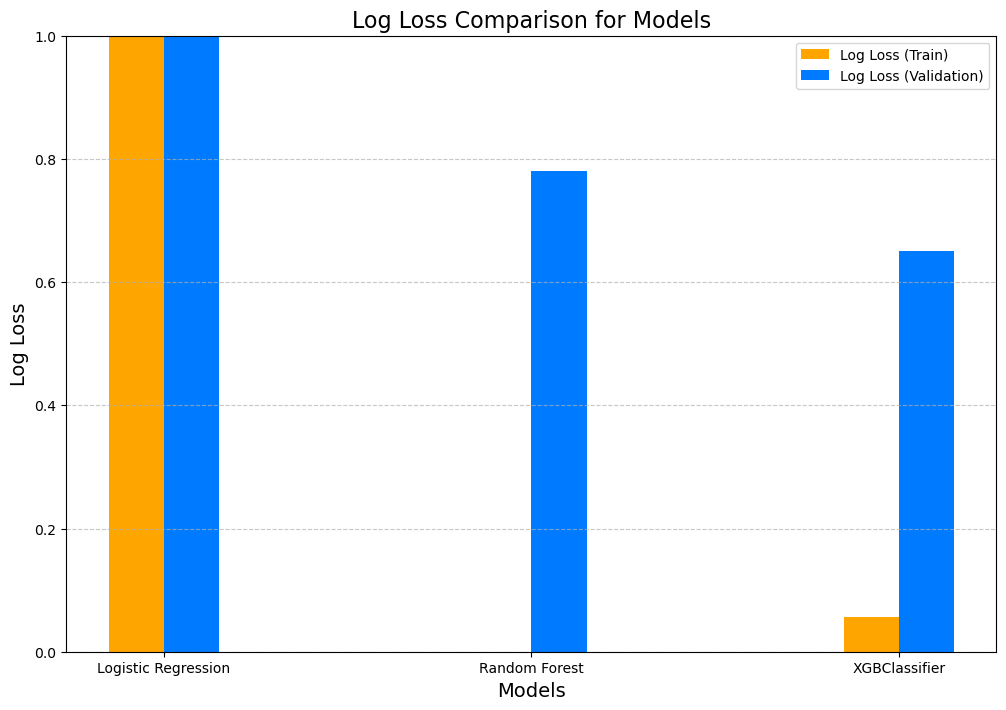

In [35]:
# plotting training and validation errors
fig2, ax2 = plt.subplots(figsize=(12, 8))
bars_train = ax2.bar(x - width/2, log_losses_train, width, label='Log Loss (Train)', color='#ffa500')  # Shift left
bars_val = ax2.bar(x + width/2, log_losses, width, label='Log Loss (Validation)', color='#007BFF')  # Shift right

ax2.set_xlabel('Models', fontsize=14)
ax2.set_ylabel('Log Loss', fontsize=14)
ax2.set_title('Log Loss Comparison for Models', fontsize=16)
ax2.set_xticks(x)
ax2.set_xticklabels(model_names)
ax2.legend()

add_value_labels(bars_train)
add_value_labels(bars_val)

# Show the plot
plt.ylim(0, 1)  # Adjusting the y-axis limit for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---------------------

Performance of the best model on the test set:

Accuracy: 0.9927797833935018
F1 score: 0.9893048128342246
Recall score: 0.9788359788359788
Log loss for model: 0.26024298475896884

Confusion Matrix:



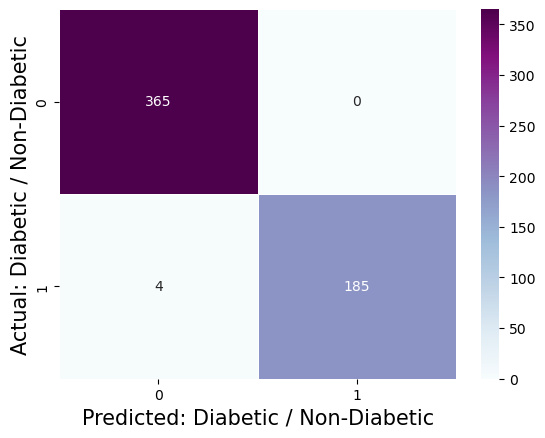

---------------------



In [36]:
# predicting the test sets for the best model

y_pred = model_XGB.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
f1Score = f1_score(test_y, y_pred)
recallScore = recall_score(test_y, y_pred)
logLoss = log_loss(test_y, y_pred)
conf_mat = confusion_matrix(test_y, y_pred)
print(f'---------------------\n')
print("Performance of the best model on the test set:\n")
print(f"Accuracy: {accuracy}")
print(f"F1 score: {f1Score}")
print(f"Recall score: {recallScore}")
print(f"Log loss for model: {logLoss}\n")
print('Confusion Matrix:\n')
plot_confusion_matrix(conf_mat)
print(f'---------------------\n')